<a href="https://colab.research.google.com/github/badrinarayanan02/machine_learning/blob/main/AmlGroupProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mall Customer Segmentation Using Clustering and Classification**



In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score,silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import classification_report

**Libraries and packages**


*   Numpy, Pandas- used for Preprocessing and analysis tasks (packages)
*   Seaborn, Matplotlib- used for visualization of data (libraries)

*   Sklearn- used mainly for machine learning, dimensionality reduction and other preprocessing tasks






In [104]:
customer_data = pd.read_csv('/content/Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
customer_data.shape

(200, 5)

# **Exploratory Data Analysis**

In [107]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are 5 attributes in the dataset and there are no null values

In [108]:
customer_data.drop(['CustomerID'],axis=1,inplace=True)

In [109]:
customer_data.describe()
#This gives us the statistical analysis of the numeric attributes in dataset

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

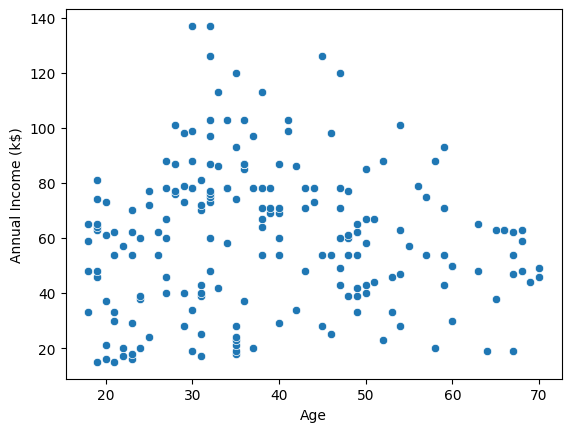

In [110]:
sns.scatterplot(data=customer_data, x='Age', y='Annual Income (k$)')

Based on the above scatter plot between annual income and age, it shows a weak negative correlation.  As the x-axis values increase, the y-axis values tend to decrease, albeit with noticeable scattering. This suggests a negative association between the two variables, but the relationship is weak due to the variability in the data points.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

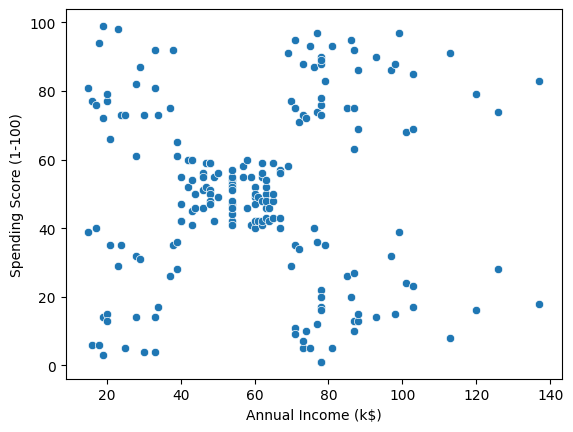

In [111]:
sns.scatterplot(data=customer_data, x='Annual Income (k$)', y='Spending Score (1-100)')

 There is no apparent pattern or correlation between these two variables, as the data points are scattered across the plot without a clear trend.

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

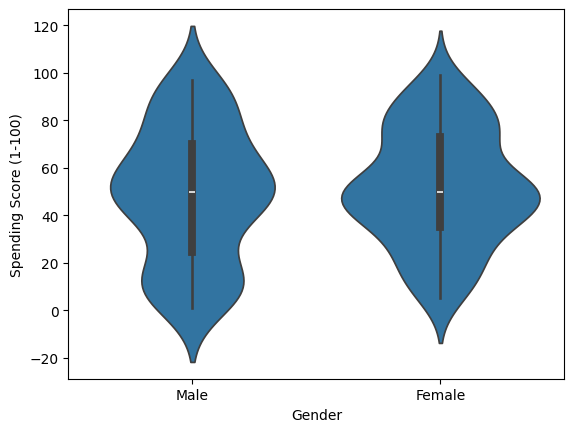

In [112]:
sns.violinplot(data=customer_data, x='Gender', y='Spending Score (1-100)')

Visualizations for age and spending score

In [113]:
# bins = [18, 25, 35, 45, 55, 65, 100]
# # labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# customer_data['AgeGroup'] = pd.cut(customer_data['Age'], bins=bins, labels=labels, right=False)

# plt.figure(figsize=(12, 6))
# sns.barplot(x='AgeGroup', y='Spending Score (1-100)', data=customer_data, ci=None, palette='viridis')
# plt.xlabel('Age Group')
# plt.ylabel('Average Spending Score')
# plt.title('Average Spending Score by Age Group')
# plt.show()

Distribution of Gender

<ipython-input-114-a2bc1a1365f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=customer_data, palette='pastel')


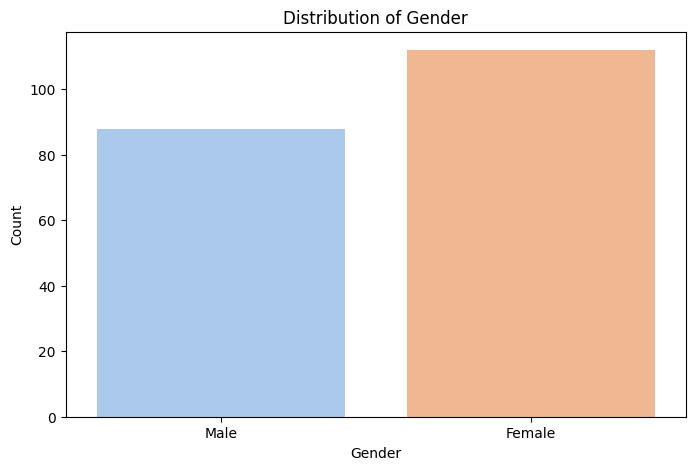

In [114]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=customer_data, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

Label Encoding is done to convert categorical values to numeric values, which can be use for further processes

In [115]:
lb = LabelEncoder()
customer_data['Gender'] = lb.fit_transform(customer_data['Gender'].values)
customer_data.head(3)
X = customer_data.iloc[:, 1:].values

# Linear Regression

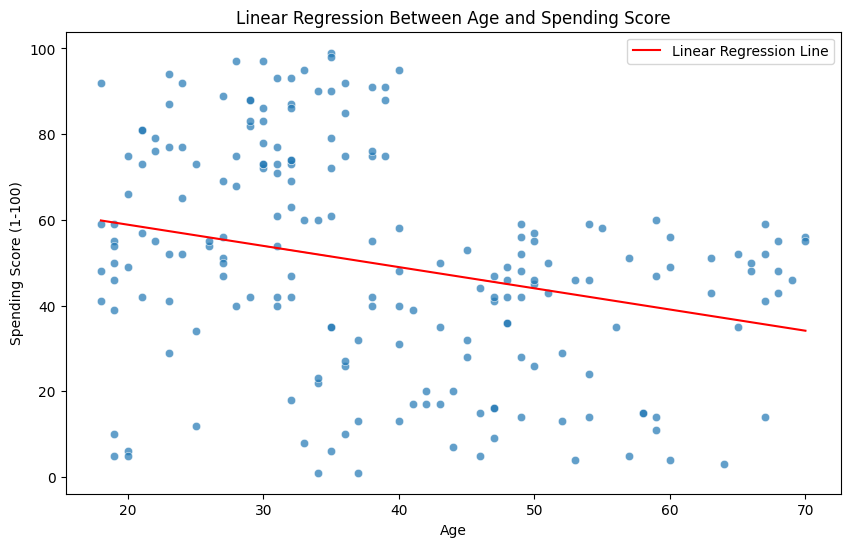

In [116]:
# Extracting relevant columns
X_age = customer_data['Age'].values.reshape(-1, 1)
y_spending_score = customer_data['Spending Score (1-100)'].values

# Split the data into training and testing sets
X_train_age, X_test_age, y_train_spending, y_test_spending = train_test_split(X_age, y_spending_score, test_size=0.2, random_state=0)

# Create and fit a linear regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_age, y_train_spending)

# Make predictions on the test set
y_pred_spending = linear_regression_model.predict(X_test_age)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=customer_data, alpha=0.7)

# Regression line
sns.lineplot(x=X_test_age.flatten(), y=y_pred_spending, color='red', label='Linear Regression Line')

# Add labels and title
plt.title('Linear Regression Between Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [117]:
mse = mean_squared_error(y_test_spending, y_pred_spending)
r_squared = r2_score(y_test_spending, y_pred_spending)
print(f"MSE: {mse}")
print(f"r_Squared: {r_squared}")

MSE: 619.3102110041343
r_Squared: 0.18241797118888137


There is a negative correlation between age and spending score, meaning that as people get older, they tend to spend less. The graph also shows that there is some variation in the data, as not all points lie exactly on the linear regression line. This means that there may be some outliers or other variables that affect the spending score besides age.

# **Clustering**

**K Means Clustering**

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

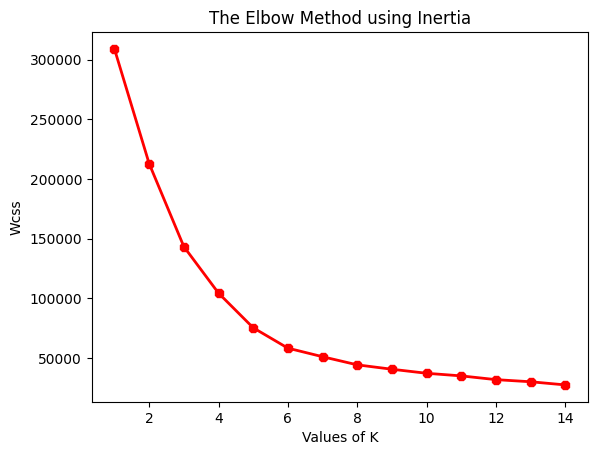

In [118]:
inertia = []
range_val = range(1, 15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(customer_data))
    inertia.append(kmean.inertia_)

plt.plot(range_val, inertia, 'bx-',linewidth=2, color="red",marker = "8")
plt.xlabel('Values of K')
plt.ylabel('Wcss')
plt.title('The Elbow Method using Inertia')
plt.show()

The elbow method is used to find the appropriate number of clusters for the K means clustering algorithm. From the above graph, the appropriate number of clusters is found to be 5.
This is the point on the graph beyond which there is no abrupt fluctuations and the graph becomes a straight line parallel to the x axis.

In [119]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_means = kmeans.fit_predict(X)
y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

X represents the features or variable which we want to perform clustering, the features used for clustering are likely 'Annual Income (k$)' and 'Spending Score (1-100)'. The result y_means contains the cluster labels assigned to each data point based on the K-means clustering algorithm.

In [120]:
kmeans.cluster_centers_

array([[45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513],
       [40.32432432, 87.43243243, 18.18918919],
       [43.12658228, 54.82278481, 49.83544304],
       [25.27272727, 25.72727273, 79.36363636]])

**Validation**

In [121]:
silhouette_avg = silhouette_score(customer_data, y_means)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.44424291275274114


# **Aggleromative Clustering**

Agglomerative Clustering is a type of hierarchical clustering algorithm. It is an unsupervised machine learning technique that divides the population into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar.

In [122]:
agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=5)
agglomerative_clusters = agglo_model.fit_predict(customer_data)

**Validation**

In [123]:
silhouette_avg_agglo = silhouette_score(customer_data, agglomerative_clusters)
print("Silhouette Score (Agglomerative Clustering):", silhouette_avg_agglo)

Silhouette Score (Agglomerative Clustering): 0.43997527212476695


# **Gaussian Mixture Model**

The Gaussian Mixture Model (GMM) is a probabilistic model used for clustering and density estimation. It assumes that the data is generated from a mixture of several Gaussian distributions, each representing a distinct cluster. GMM assigns probabilities to data points, allowing them to belong to multiple clusters simultaneously.

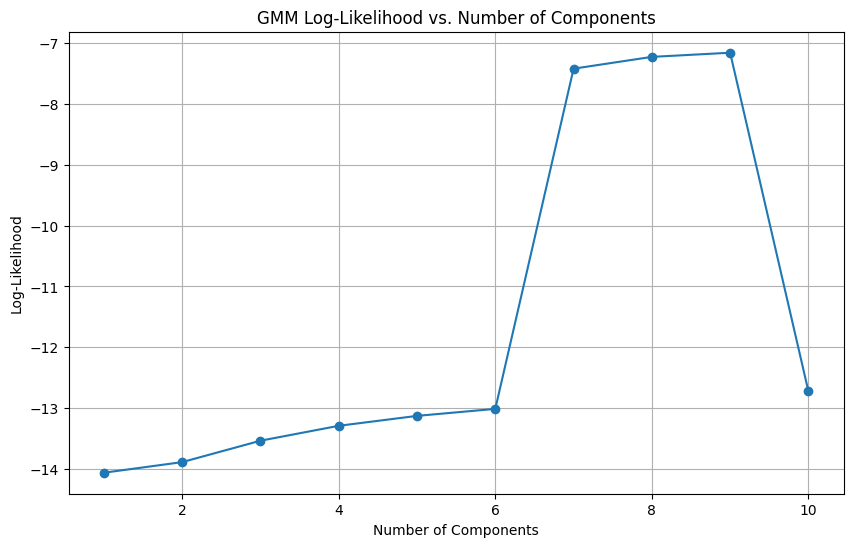

In [124]:
n_components_range = range(1, 11)

log_likelihoods = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(customer_data)
    log_likelihoods.append(gmm.score(customer_data))

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, log_likelihoods, marker='o')
plt.title('GMM Log-Likelihood vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Log-Likelihood')
plt.grid(True)
plt.show()

**Inference**

Log-likelihood increases rapidly from 2 to 4 components: This suggests that the model significantly improves its fit to the data as the number of components increases within this range.

Elbow Point

The elbow point occurs at 4 components: This is where the curve transitions from a steep incline to a plateau, suggesting that 4 components might be a reasonable choice for the GMM model.

In [125]:
GaussianMixture_model = GaussianMixture(n_components=4)
gmm_clusters = GaussianMixture_model.fit_predict(customer_data)

**Validation**

In [126]:
gaussian_mixture_model = silhouette_score(customer_data, gmm_clusters)
print("Silhouette Score (Gaussian Mixture):", gaussian_mixture_model)

Silhouette Score (Gaussian Mixture): 0.37746946513753726


From the above analysis, we saw that "K-Means" algorithm has high silhouette score as compared to others.

# **DB SCAN**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm used for data analysis and pattern recognition. It groups data points based on their density, identifying clusters of high-density regions and classifying outliers as noise.

In [127]:
X = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]

db = DBSCAN(eps=3, min_samples=4, metric='euclidean')
labels = db.fit_predict(X)

customer_data['DBSCAN_Clusters'] = labels

labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [128]:
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[db.core_sample_indices_]=True

# Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)
print('No of clusters:',n_clusters)

No of clusters: 9


No of clusters: 9


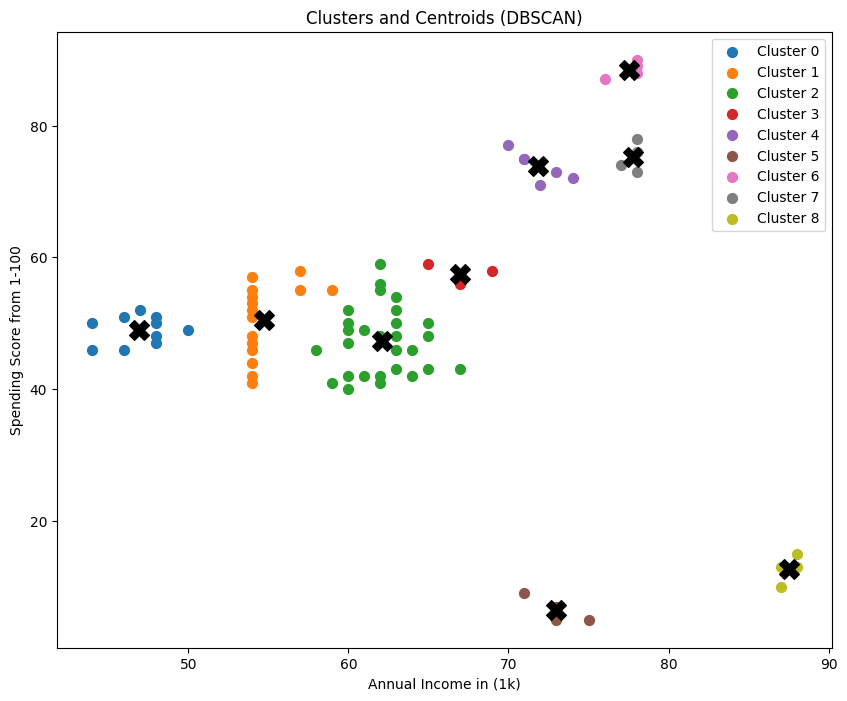

In [129]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('No of clusters:', n_clusters)

plt.figure(figsize=(10, 8))

# Excluding noise points
for cluster_label in set(labels) - {-1}:
    cluster_points = X[labels == cluster_label]

    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster_label}')

    # Calculating and plot the centroid
    centroid = cluster_points.mean(axis=0)
    plt.scatter(centroid[0], centroid[1], s=200, marker='X', color='black')

plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters and Centroids (DBSCAN)')
plt.legend()
plt.show()

According to this graph, most people have moderate annual income (around 40k-60k) and moderate spending score (around 40-60). These people form a dense cluster in the middle of the graph. Other people have more varied income and spending habits, and they are scattered across the graph. Some people have high income but low spending score, while others have low income but high spending score. These people may have different preferences, needs, or lifestyles.

# **Cluster Visualization**

**K Means Clusters**

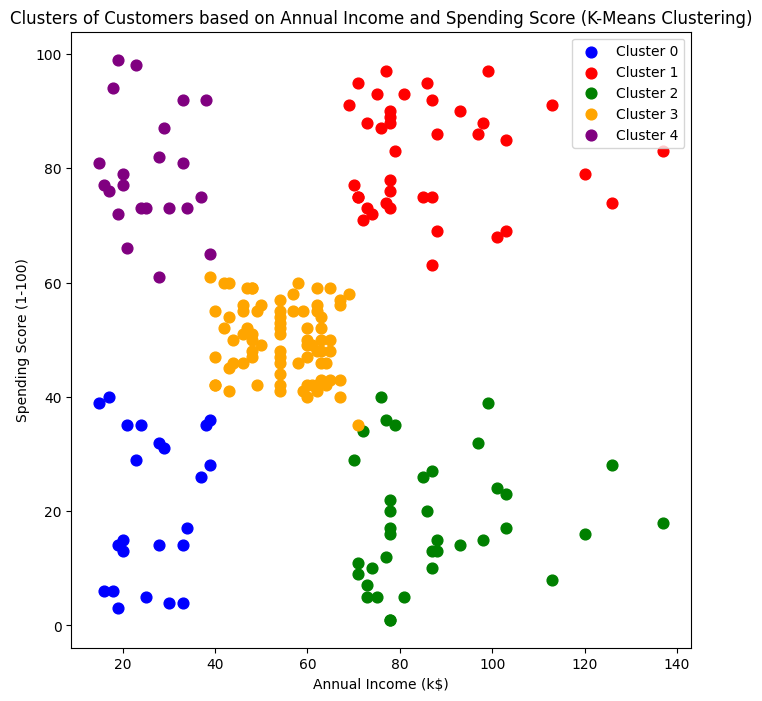

In [130]:
customer_data["label"] = y_means
plt.figure(figsize=(8, 8))

# Scatter plot for each cluster
plt.scatter(customer_data["Annual Income (k$)"][customer_data.label == 0], customer_data["Spending Score (1-100)"][customer_data.label == 0], c='blue', s=60, label='Cluster 0')
plt.scatter(customer_data["Annual Income (k$)"][customer_data.label == 1], customer_data["Spending Score (1-100)"][customer_data.label == 1], c='red', s=60, label='Cluster 1')
plt.scatter(customer_data["Annual Income (k$)"][customer_data.label == 2], customer_data["Spending Score (1-100)"][customer_data.label == 2], c='green', s=60, label='Cluster 2')
plt.scatter(customer_data["Annual Income (k$)"][customer_data.label == 3], customer_data["Spending Score (1-100)"][customer_data.label == 3], c='orange', s=60, label='Cluster 3')
plt.scatter(customer_data["Annual Income (k$)"][customer_data.label == 4], customer_data["Spending Score (1-100)"][customer_data.label == 4], c='purple', s=60, label='Cluster 4')

# Labels and Title
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title('Clusters of Customers based on Annual Income and Spending Score (K-Means Clustering)')
plt.legend()
plt.show()

* Cluster 0 and Cluster 1 are the most profitable segments, as they have high spending scores and either low or high incomes. These customers are likely to be impulse buyers, fashion enthusiasts, or luxury seekers. They could be targeted with promotions, discounts, or personalized offers to increase their satisfaction and retention.
* Cluster 2 is the average segment, as they have moderate spending scores and incomes. These customers are likely to be rational buyers, who look for quality and value. They could be targeted with loyalty programs, referrals, or feedback surveys to increase their engagement and loyalty.
* Cluster 3 and Cluster 4 are the least profitable segments, as they have low spending scores and either high or low incomes. These customers are likely to be frugal buyers, who are careful and conservative with their spending. They could be targeted with educational campaigns, testimonials, or free trials to increase their awareness and trust.

**GMM Clusters**

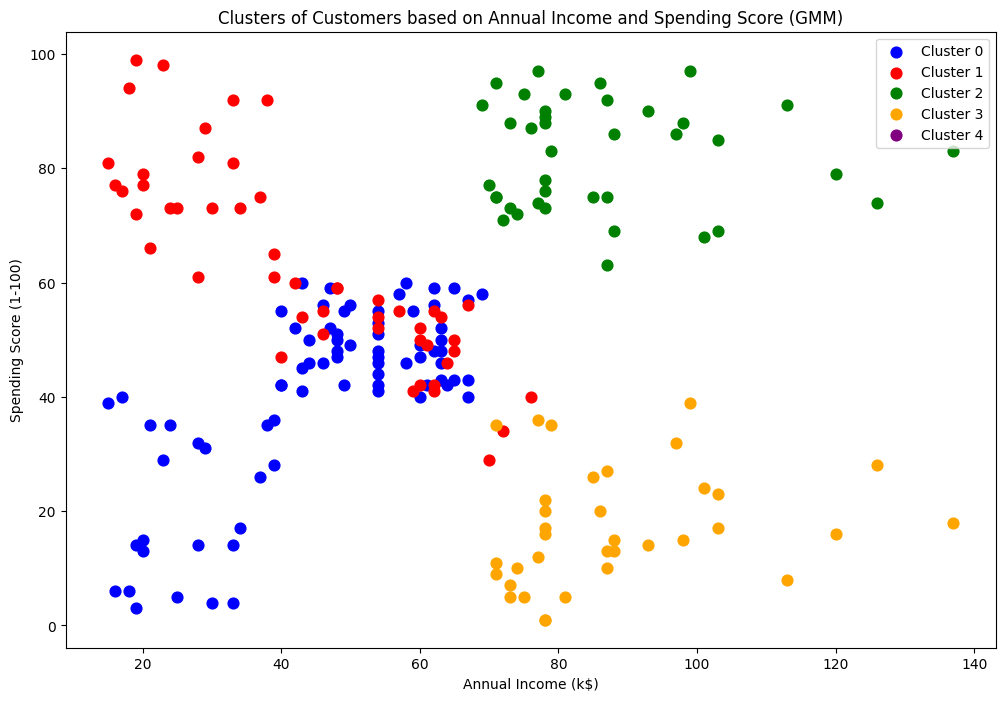

In [131]:
customer_data["label"] = gmm_clusters
plt.figure(figsize=(12, 8))

# Scatter plot for each cluster
plt.scatter(customer_data["Annual Income (k$)"][customer_data.label == 0], customer_data["Spending Score (1-100)"][customer_data.label == 0], c='blue', s=60, label='Cluster 0')
plt.scatter(customer_data["Annual Income (k$)"][customer_data.label == 1], customer_data["Spending Score (1-100)"][customer_data.label == 1], c='red', s=60, label='Cluster 1')
plt.scatter(customer_data["Annual Income (k$)"][customer_data.label == 2], customer_data["Spending Score (1-100)"][customer_data.label == 2], c='green', s=60, label='Cluster 2')
plt.scatter(customer_data["Annual Income (k$)"][customer_data.label == 3], customer_data["Spending Score (1-100)"][customer_data.label == 3], c='orange', s=60, label='Cluster 3')
plt.scatter(customer_data["Annual Income (k$)"][customer_data.label == 4], customer_data["Spending Score (1-100)"][customer_data.label == 4], c='purple', s=60, label='Cluster 4')

# Labels and Title
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title('Clusters of Customers based on Annual Income and Spending Score (GMM)')
plt.legend()
plt.show()


The graph shows that there are five clusters of different sizes and shapes, which could correspond to different segments of customers based on their annual income and spending score.

The cluster in the middle could represent customers who have moderate income but high spending score. These customers could be impulsive or extravagant shoppers who spend more than they earn.

The cluster on the top right could represent customers who have high income and high spending score. These customers could be affluent or luxurious shoppers who spend a lot on shopping

**Agglomerative Clustering**

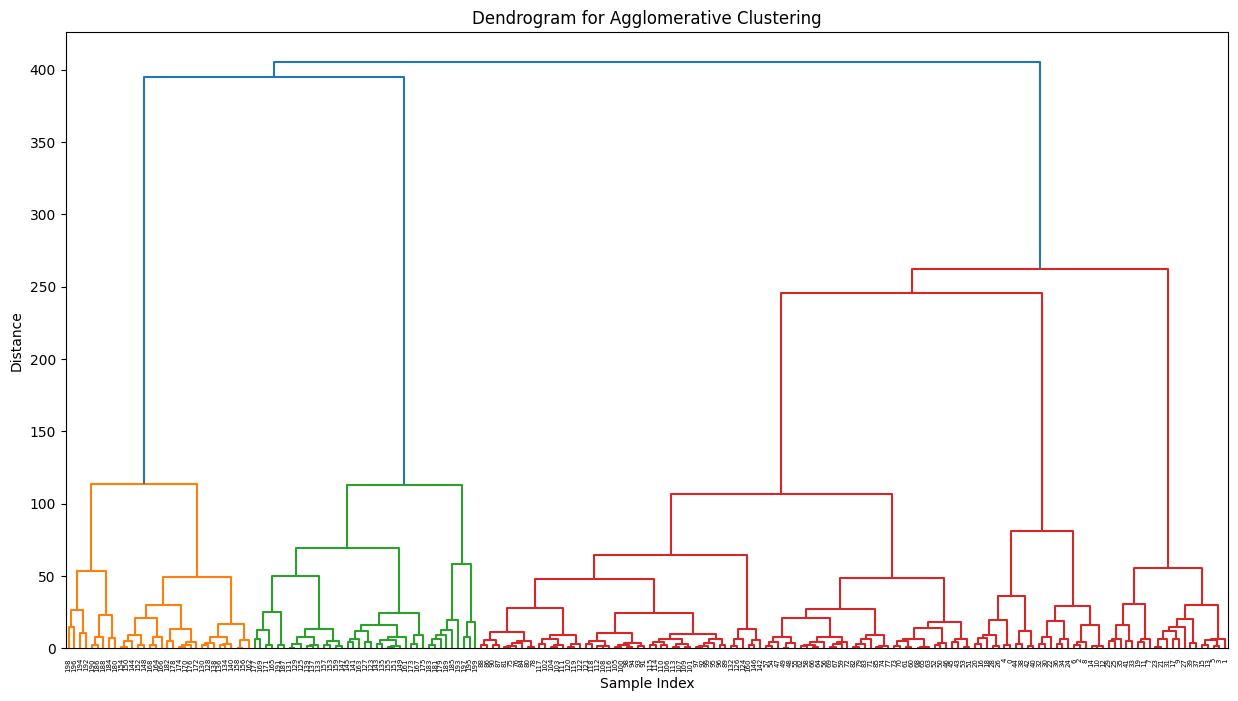

In [132]:
# Create dendrogram
linked = linkage(X, 'ward')
plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

* The largest cluster (blue) contains customers who have low to moderate annual income and spending score. This could be a segment of frugal or careful customers who do not spend much on shopping.

* The second largest cluster (orange) contains customers who have high annual income and high spending score. This could be a segment of affluent or extravagant customers who spend a lot on shopping.

* The third largest cluster (green) contains customers who have moderate annual income and low spending score. This could be a segment of average or thrifty customers who save more than they spend.

* The fourth largest cluster (red) contains customers who have low annual income and high spending score. This could be a segment of poor or impulsive customers who spend more than they earn.


**Inference:** K Means Clustering has the best silhouette score when compared all other clustering algorithms

# **KNN Classification**

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for classification and regression tasks. In the context of classification, KNN is particularly effective in assigning a class label to an input data point based on the majority class of its k nearest neighbors in the feature space.

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
y = customer_data['label']

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Step 4: Apply KNN Classification

k_neighbors = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)

# Fit the model

knn_classifier.fit(X_train, y_train)

# Predict on the test set

y_pred = knn_classifier.predict(X_test)

Evaluating the model

In [153]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Additional metrics

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.975
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        10

    accuracy                           0.97        40
   macro avg       0.98      0.98      0.98        40
weighted avg       0.98      0.97      0.97        40

Confusion Matrix:
[[12  1  0  0]
 [ 0 12  0  0]
 [ 0  0  5  0]
 [ 0  0  0 10]]


KNN with PCA

In [154]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_standardized)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

knn_classifier_pca = KNeighborsClassifier(n_neighbors=k_neighbors)

knn_classifier_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = knn_classifier_pca.predict(X_test_pca)

Evaluating the model with PCA

In [155]:
# Additional metrics with PCA

accuracy_with_pca = accuracy_score(y_test_pca, y_pred_pca)
print("\nAccuracy with PCA:", accuracy_with_pca)

print("Classification Report with PCA:")
print(classification_report(y_test_pca, y_pred_pca))

print("Confusion Matrix with PCA:")
print(confusion_matrix(y_test_pca, y_pred_pca))


Accuracy with PCA: 0.975
Classification Report with PCA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.92      0.96        12
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00        10

    accuracy                           0.97        40
   macro avg       0.96      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40

Confusion Matrix with PCA:
[[13  0  0  0]
 [ 0 11  1  0]
 [ 0  0  5  0]
 [ 0  0  0 10]]


**Inference**

Dataset is small and the original features are interpretable and manageable. However, we are exploring and analyzing the characteristics of the data to make an informed decision. If the dataset grows in the future or there might be
issues related to the number of features, we can reconsider applying PCA.

**Drawbacks:**

While a high accuracy is positive,  the model might be overfitting the training data. Overfitting occurs when a model learns the training data too well, including its noise and outliers, leading to poor generalization to new, unseen data.
Owing to the small size of the dataset, it is possible that the model maybe facing an overfitting issue